# 🚜  Predicting the sale price of bulldozers using machine learning

In this project we will attempt to use regression based supervized machine learning technique to predict the sale price of bulldozer.

## Problem Definition

> How well can we predict future sale price of bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for.


## Data

The data has been downloaded from Kaggle bluebook for bulldozers competition.

https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets-

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## Evaluation

The evaluation metric used for this competition is Root Mean Square Log Error (RMSLE)

## Features

Here are the features of the bulldozer. The same features can be found in Data Dictionary excel sheet in Kaggle link -

* SalesID => unique identifier of a particular sale of a machine at auction

* MachineID => identifier for a particular machine; machines may have multiple sales

* ModelID => identifier for a unique machine model (i.e. fiModelDesc)

* datasource =>source of the sale record; some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.

* auctioneerID => identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.

* YearMade => year of manufacturer of the Machine

* MachineHoursCurrentMeter =>   current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale

* UsageBand => value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.

* Saledate => time of sale

* Saleprice (Target) => cost of sale in USD 

* fiModelDesc =>   Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor

* fiBaseModel => disaggregation of fiModelDesc
* fiSecondaryDesc => disaggregation of fiModelDesc
* fiModelSeries => disaggregation of fiModelDesc
* fiModelDescriptor => disaggregation of fiModelDesc
* ProductSize => The size class grouping for a product group. Subsets within product group.
* ProductClassDesc => description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
* State => US State in which sale occurred
* ProductGroup => identifier for top-level hierarchical grouping of fiModelDesc
* ProductGroupDesc => description of top-level hierarchical grouping of fiModelDesc
* Drive_System => machine configuration; typcially describes whether 2 or 4 wheel drive
* Enclosure => machine configuration - does machine have an enclosed cab or not
* Forks => machine configuration - attachment used for lifting
* Pad_Type => machine configuration - type of treads a crawler machine uses
* Ride_Control => machine configuration - optional feature on loaders to make the ride smoother
* Stick => machine configuration - type of control
* Transmission => machine configuration - describes type of transmission; typically automatic or manual
* Turbocharged => machine configuration - engine naturally aspirated or turbocharged
* Blade_Extension => machine configuration - extension of standard blade
* Blade_Width => machine configuration - width of blade
* Enclosure_Type => machine configuration - does machine have an enclosed cab or not
* Engine_Horsepower => machine configuration - engine horsepower rating
* Hydraulics => machine configuration - type of hydraulics
* Pushblock => machine configuration - option
* Ripper => machine configuration - implement attached to machine to till soil
* Scarifier => machine configuration - implement attached to machine to condition soil
* Tip_control => machine configuration - type of blade control
* Tire_Size => machine configuration - size of primary tires
* Coupler => machine configuration - type of implement interface
* Coupler_System => machine configuration - type of implement interface
* Grouser_Tracks => machine configuration - describes ground contact interface
* Hydraulics_Flow => machine configuration - normal or high flow hydraulic system
* Track_Type => machine configuration - type of treads a crawler machine uses
* Undercarriage_Pad_Width => machine configuration - width of crawler treads
* Stick_Length => machine configuration - length of machine digging implement
* Thumb => machine configuration - attachment used for grabbing
* Pattern_Changer => machine configuration - can adjust the operator control configuration to suit the user
* Grouser_Type => machine configuration - type of treads a crawler machine uses
* Backhoe_Mounting => machine configuration - optional interface used to add a backhoe attachment
* Blade_Type => machine configuration - describes type of blade
* Travel_Controls => machine configuration - describes operator control configuration
* Differential_Type => machine configuration - differential type, typically locking or standard
* Steering_Controls => machine configuration - describes operator control configuration


In [277]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import sklearn;

import datetime as dt;

# For modelling
from sklearn.ensemble import RandomForestRegressor;

# metrics
from sklearn.metrics import mean_squared_log_error,mean_absolute_error, r2_score;
from sklearn.model_selection import RandomizedSearchCV

In [209]:
# import training and validation sets

df= pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False);
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [211]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

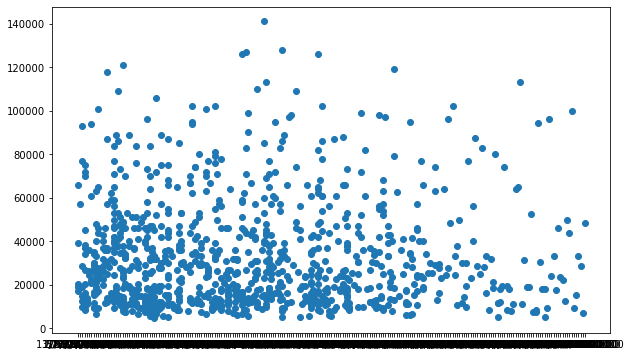

In [212]:
fig, ax = plt.subplots(figsize=(10,6));
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

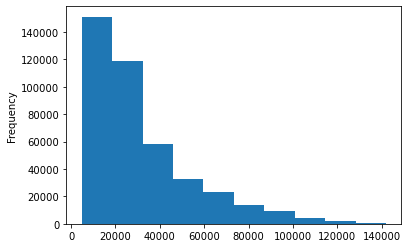

In [213]:
df.SalePrice.plot.hist();

### Parsing Dates
When we work with time series data, we might want to enrich time and date component as much as poosible.
You can tell pandas which column has dates using `parsedates` parameter

In [214]:
df=pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',parse_dates=['saledate'],low_memory=False)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

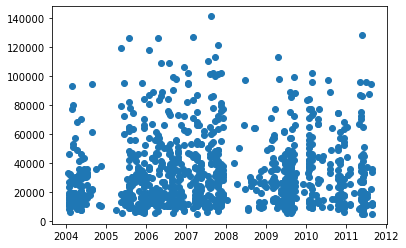

In [216]:
fig, ax =plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [217]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### sort dataframe by saledate
When working with timeseries data, it is a good idea to sort it by date

In [218]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [219]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

 ### Make copy of the original dataframe, so that when we manipulate the copy, we still have the original data

In [220]:
df_tmp=df.copy()

In [221]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [222]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for `saledate` column

In [223]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year;
df_tmp['saleMonth'] = df_tmp.saledate.dt.month;
df_tmp['saleDay'] = df_tmp.saledate.dt.day;
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek;
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear;

In [224]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [225]:
# Now we have enriched our dataframe with date time features, we can remove `saledate`

df_tmp.drop(['saledate'],axis=1,inplace=True);

### Convert string into categories

One way we can turn all our data into numbers is by converting them into Pandas categories

In [226]:
# find columns which contain strings
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [227]:
# This will turn all strings into categories

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered();

In [228]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [229]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [230]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Thanks to pandas categories, we have way to access all data in the form of numbers.

Now we need to figure out a way to solve the problem of missing data

In [231]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numeric missing values first

In [232]:
# check for columns with numeric null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+'_is_missing'] = pd.isnull(content);
            df_tmp[label] = content.fillna(content.median());
            print(label) 

auctioneerID
MachineHoursCurrentMeter


In [233]:
df_tmp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,...,35000,7500,13000,53000,39000,16000,6000,16000,55000,34000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F,...,544H,317,S175,WA320,710VHP,D38E,2064,337G,12G,544H


In [234]:
# Check if there are numeric value columns containing nan/unknown/null still left
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [235]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [236]:
# Check for columns which are categorical and have missing (nan) values

for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        if content.isna().sum():
            print (label)
        

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [237]:
# Turn categorical variables into numbers and fill missing

for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        # Add binary column to indicate missing values
        df_tmp[label+'is_missing'] = pd.isnull(content);
        # Turn categories into numbers + 1
        df_tmp[label]=pd.Categorical(content).codes + 1;
            

In [238]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 101.1 MB


In [239]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

### Now that all of our data is numeric and dataframe has no missing values, we should be able to build a machine learning model

In [240]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [241]:
len(df_tmp)

412698

In [245]:
%%time
# Instantiate a model
model = RandomForestRegressor(n_jobs=-1,random_state=42)
# Fit the model
model.fit(df_tmp.drop(["SalePrice"],axis=1),df_tmp['SalePrice'])

Wall time: 5min 9s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [246]:
# Score the model
model.score(df_tmp.drop(["SalePrice"],axis=1),df_tmp['SalePrice'])

0.9875468079970562

**Question:** Why isn't the above metric reliable?

**Answer:** We evaluated our model on training data itself instead of test data 

### Spliting data into train/validation sets

In [250]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [251]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012];
df_train = df_tmp[df_tmp.saleYear != 2012];

len(df_val), len(df_train)

(11573, 401125)

In [253]:
# Split data into X(features) and y(target)
X_train = df_train.drop(["SalePrice"],axis=1);
y_train = df_train.SalePrice;
X_valid = df_val.drop(["SalePrice"],axis=1);
y_valid = df_val.SalePrice;

X_train.shape , y_train.shape , X_valid.shape , y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [271]:
# Create evaluation function (competition uses RMSLE)

def rmsle(y_test,y_pred):
    '''
    Calculate root mean squared log error (rmsle) between predictions(y_pred) and true labels(y_test)
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

# Create function to evaluate model on few different levels

def show_scores(model):
    train_preds=model.predict(X_train);
    val_preds=model.predict(X_valid);
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Valid MAE":mean_absolute_error(y_valid,val_preds),
            "Training RMSLE":rmsle(y_train,train_preds),
            "Valid RMSLE":rmsle(y_valid,val_preds),
            "Training R^2":r2_score(y_train,train_preds),
            "Valid R^2":r2_score(y_valid,val_preds)}
    return scores


## Testing our model on a subset (To tune the Hyperparameters fast)

In [272]:
# # This will take far too long 
# %%time
# model =RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X_train,y_train)

In [273]:
len(X_train)

401125

In [274]:
# Change max samples value

model = RandomForestRegressor(n_jobs=-1,random_state=42, max_samples=10000)

In [275]:
%%time
#Cutting down max number of samples for each estimator improves training time
model.fit(X_train,y_train)

Wall time: 9.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [276]:
print(show_scores(model))

{'Training MAE': 5561.2988092240585, 'Valid MAE': 7177.26365505919, 'Training RMSLE': 0.257745378256977, 'Valid RMSLE': 0.29362638671089003, 'Training R^2': 0.8606658995199189, 'Valid R^2': 0.8320374995090507}


## HyperParameter Tuning with RandomizedSearchCV

In [283]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [300]:
%%time

# Different random forest regressor hyperparameters

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,'sqrt','auto'],
           "max_samples":[10000]};

# Instantiate RandomizedSearchCV model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),rf_grid, n_iter=100,cv=5,verbose=True);
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 61.1min finished


Wall time: 1h 1min 14s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [306]:
# find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [307]:
show_scores(rs_model)

{'Training MAE': 5628.558867186039,
 'Valid MAE': 7293.184818111121,
 'Training RMSLE': 0.2600430717620813,
 'Valid RMSLE': 0.298443989931521,
 'Training R^2': 0.8571275990604723,
 'Valid R^2': 0.8269456652365007}

### Train model with best hyperparameters

These were found after 100 iterations with `RandomizedSearchCV()`

### Best params info (one of the `RandomizedSearchCV executions)

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [309]:
%%time

# Most Ideal Hyperparameters based on 100 iterations

ideal_model = RandomForestRegressor(n_jobs=-1,random_state=42,
                                    n_estimators = rs_model.best_params_['n_estimators'] ,
                                    max_depth = rs_model.best_params_['max_depth'] ,
                                    min_samples_split = rs_model.best_params_['min_samples_split'],
                                    min_samples_leaf = rs_model.best_params_['min_samples_leaf'],
                                    max_features = rs_model.best_params_['max_features'],
                                    max_samples=None
                                    ) # for final training after hyperparameter tuning is complete we want all samples
                                    # we use random state for reproducible results
ideal_model.fit(X_train,y_train)

Wall time: 2min 30s


RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42)

In [310]:
show_scores(ideal_model)

{'Training MAE': 1619.9821062013089,
 'Valid MAE': 6162.381013998099,
 'Training RMSLE': 0.08692959703591632,
 'Valid RMSLE': 0.256850412231605,
 'Training R^2': 0.9865376373111854,
 'Valid R^2': 0.8708476925630553}

## Make predictions on test data

In [318]:
# import test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"]);
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data. Getting the test dataset in same format as training dataset

In [319]:
def preprocess_data(dataframe):
    """
    Performs transformations on df and returns transformed df
    """
    dataframe['saleYear'] = dataframe.saledate.dt.year;
    dataframe['saleMonth'] = dataframe.saledate.dt.month;
    dataframe['saleDay'] = dataframe.saledate.dt.day;
    dataframe['saleDayOfWeek'] = dataframe.saledate.dt.dayofweek;
    dataframe['saleDayOfYear'] = dataframe.saledate.dt.dayofyear;
    dataframe.drop(['saledate'],axis=1,inplace=True);
    
    # This will turn all strings into categories

    for label,content in dataframe.items():
        if pd.api.types.is_string_dtype(content):
            dataframe[label]=content.astype("category").cat.as_ordered();
    
    # Fill numeric values with median
    for label,content in dataframe.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                dataframe[label+'_is_missing'] = pd.isnull(content);
                dataframe[label] = content.fillna(content.median());
                
    # Turn categorical variables into numbers and fill missing

    for label, content in dataframe.items():
        if pd.api.types.is_categorical_dtype(content):
            # Add binary column to indicate missing values
            dataframe[label+'is_missing'] = pd.isnull(content);
            # Turn categories into numbers + 1
            dataframe[label]=pd.Categorical(content).codes + 1;
        
    return dataframe;

In [320]:
# Process test data

df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [321]:
X_train.shape , df_test.shape

((401125, 102), (12457, 101))

In [323]:
# Check the difference between training and test columns
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [324]:
# manually add 'auctioneerID_is_missing' column
df_test['auctioneerID_is_missing']=False;
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [325]:
# Check the difference between training and test columns
set(X_train.columns)-set(df_test.columns)

set()

In [326]:
# Now that test dataframe and training dataframe have same features, we can make predictions
test_preds=ideal_model.predict(df_test);

In [327]:
test_preds

array([20562.5 , 25648.75, 48262.5 , ..., 13037.5 , 17862.5 , 33275.  ])

In [328]:
len(test_preds)

12457

### Format predictions into format Kaggle requires-
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [329]:
df_preds = pd.DataFrame();
df_preds['salesID'] = df_test['SalesID'];
df_preds['salesPrice'] = test_preds;
df_preds

,salesID,salesPrice
0,1227829,20562.50
1,1227844,25648.75
2,1227847,48262.50
3,1227848,80500.00
4,1227863,43207.50
...,...,...
12452,6643171,54625.00
12453,6643173,11643.75
12454,6643184,13037.50
12455,6643186,17862.50


In [332]:
# Export predictions to csv

df_preds.to_csv("data/bluebook-for-bulldozers/model_test_predictions.csv")

# Save model
import pickle as pkl;

pkl.dump(ideal_model,file = open("data/bluebook-for-bulldozers/final_model.pkl",'wb'));

In [335]:
# Load model and check if correct model is loaded
show_scores(pkl.load(open("data/bluebook-for-bulldozers/final_model.pkl",'rb')))

{'Training MAE': 1619.9821062013089,
 'Valid MAE': 6162.381013998099,
 'Training RMSLE': 0.08692959703591632,
 'Valid RMSLE': 0.256850412231605,
 'Training R^2': 0.9865376373111854,
 'Valid R^2': 0.8708476925630553}

In [336]:
show_scores(ideal_model)

{'Training MAE': 1619.9821062013089,
 'Valid MAE': 6162.381013998099,
 'Training RMSLE': 0.08692959703591632,
 'Valid RMSLE': 0.256850412231605,
 'Training R^2': 0.9865376373111854,
 'Valid R^2': 0.8708476925630553}

## Feature Importance

Seeks to figure out most important attributes/features used by model in predicting sale price

In [337]:
ideal_model.feature_importances_

array([4.97480580e-02, 1.63931656e-02, 3.24860872e-02, 4.12653584e-04,
       4.45962180e-03, 2.61482743e-01, 3.23359188e-03, 1.17191834e-03,
       2.03551162e-02, 7.86876505e-02, 5.11213370e-02, 4.30072118e-03,
       3.64545873e-03, 2.27858609e-01, 3.91799775e-02, 8.83974920e-03,
       1.74224358e-04, 1.50066691e-04, 1.70199301e-03, 8.73372385e-03,
       4.37432956e-04, 4.04907655e-05, 5.44853893e-04, 1.77784041e-04,
       1.67495638e-03, 2.62243645e-05, 8.06453887e-05, 6.34948678e-03,
       1.67689065e-04, 5.39596893e-05, 3.25978189e-03, 2.26742957e-03,
       2.31485982e-03, 4.35816563e-03, 2.42311570e-04, 1.74679795e-03,
       1.00663327e-03, 1.95470754e-02, 5.89307209e-06, 9.02231302e-06,
       2.01654806e-04, 1.09534389e-03, 1.32186466e-03, 7.64844185e-04,
       2.42367671e-04, 4.84277429e-04, 1.88738873e-04, 1.65774664e-03,
       9.53820542e-04, 1.78192439e-04, 2.02515756e-04, 7.65079859e-02,
       3.40335315e-03, 9.19121194e-03, 4.54691031e-03, 1.47386417e-02,
      

In [338]:
len(ideal_model.feature_importances_)

102

In [339]:
len(X_train.columns)

102

In [354]:
feat_imp=pd.DataFrame({'feat_importance':ideal_model.feature_importances_},X_train.columns);
feat_imp

,feat_importance
SalesID,0.049748
MachineID,0.016393
ModelID,0.032486
datasource,0.000413
auctioneerID,0.004460
...,...
Backhoe_Mountingis_missing,0.000232
Blade_Typeis_missing,0.000198
Travel_Controlsis_missing,0.000058
Differential_Typeis_missing,0.000055


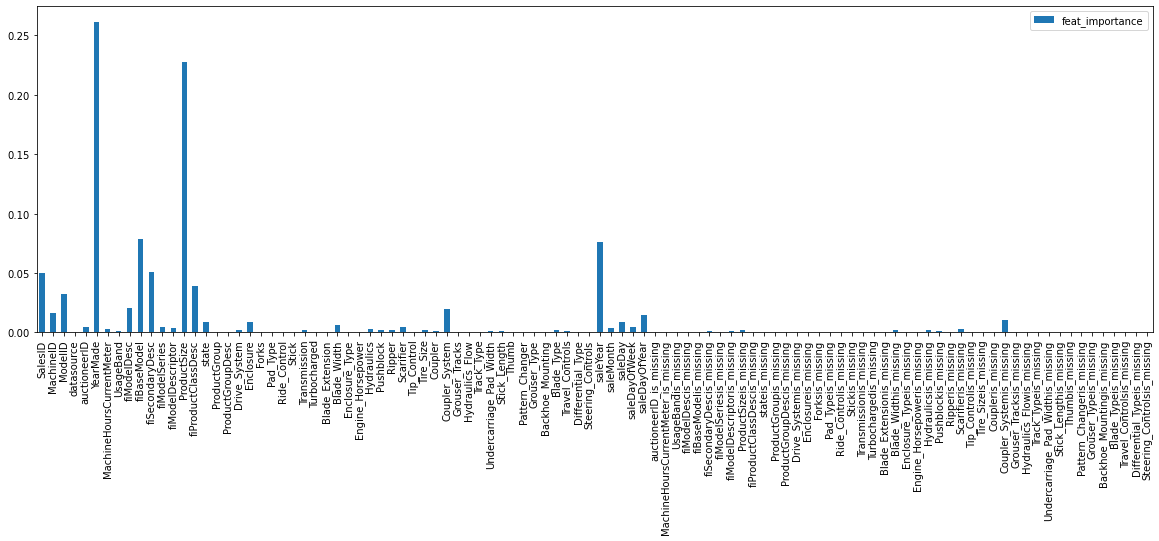

In [355]:
feat_imp.plot(figsize=(20,6),kind='bar');

In [364]:
feat_imp.sort_values(by=['feat_importance'], ascending=False, inplace=True)

Text(0.5, 1.0, 'Feature importance plot of 15 most important features')

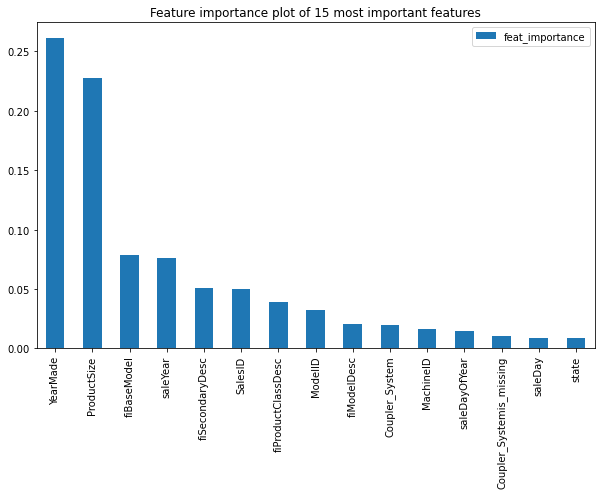

In [370]:
feat_imp[:15].plot(kind='bar',figsize=(10,6))
plt.title('Feature importance plot of 15 most important features')